1. Annotate w/ laclip 
2. Annotate w/ reason for pathology missing 
3. annotate for the reason that the imaging might be missing
4. Substitution of 0's for NA's, Annotate those substitutions, find where quant failed for perf
5. Annotates for inclusion of modalities 
6. Imputes b1000 data from b2000 using linear modeling 
7. Adds in output from get_igt_stats.ipynb, w/ %CEL, NEL, NEC & inclusion criteria (can be found in DataWrangling/GetMergeData/)
8. Excludes ependymomas and other non-astro non-oligo HGGs (desired_hist) 
9. Creates outcome labels (multnom_out), adds necrosis, makes PN category (pathologically normal) that are in CEL or in the NEL region labeled TxE  
12. Adds in binary operator to include the data only if it's rHGG or TxE 


In [1]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

## 1. LacLip Annotation

In [2]:
getwd()

[1] "/home/sf673542/DataWrangling/AnnotateData"

In [3]:
all_recgli = read.csv("../GetMergeData/July2018/researchPath_withInVivoData.csv")
dim(all_recgli)

[1] 639  45

In [4]:
laclip = ifelse(all_recgli$nlac == all_recgli$nlip, 1, 0)
table(laclip)
laclip_values = ifelse(laclip==1, all_recgli$nlac, all_recgli$nlac+all_recgli$nlip)
all_recgli = data.frame(all_recgli[,c(1:42)], laclip = laclip_values, all_recgli[,c(43:dim(all_recgli)[2])])
## making indeterminable shorter: 
all_recgli$tumor_cell_evaluation = gsub("Indeterminable", "Ind", all_recgli$tumor_cell_evaluation)
dim(all_recgli)

laclip
  0   1 
125 179 

[1] 639  46

In [5]:
colnames(all_recgli)

[1] "b_number"                 "t_number"                
 [3] "sf_number"                "current_scan_date"       
 [5] "current_surgery_date"     "current_hist_grade"      
 [7] "current_hist_type"        "roi.label"               
 [9] "tumor_cell_evaluation"    "necrosis"                
[11] "f8_delicate"              "f8_simple"               
[13] "f8_complex"               "mib_1"                   
[15] "bx_pure_treatment_effect" "nfse"                    
[17] "nfl"                      "nt1c"                    
[19] "nt1v"                     "nadc.1"                  
[21] "nfa.1"                    "nev1.1"                  
[23] "nev2.1"                   "nev3.1"                  
[25] "nevrad.1"                 "nadc.2"                  
[27] "nfa.2"                    "nev1.2"                  
[29] "nev2.2"                   "nev3.2"                  
[31] "nevrad.2"                 "cbvn_nlin"               
[33] "phn_nlin"                 "phn_npar"                
[35] "recovn_npar"              "cni"                     
[37] "ccri"                     "crni"                    
[39] "ncho"                     "ncre"                    
[41] "nnaa"                     "nlip"                    
[43] "laclip"                   "nlac"                    
[45] "olddata"                  "newdata"

In [6]:
write.csv(all_recgli, file = "Annot1_researchPath_withInVivoData.csv", row.names = F)

## 2. Pathology Comments For Outcome Determination

In [7]:
all_recgli = read.csv("Annot1_researchPath_withInVivoData.csv")

Here we have to go & download most recent pathology comment reports from cerebro. 
Go to https://braino.radiology.ucsf.edu/ncvi/secure/clinical/search/AdvancedSearch2.do?cid=5

1. For old data, click Search Criteria = Study tag equals P01_PREOP_REC
2. Under "Tissue Samples (Research)" Click "Tissue Bank Vial ID" 
3. Under "Pathology Events (Research)" Click "Pathology Comments" 
4. Click the green button to download, save as path_comments_oldP01.csv, & upload to CWD 
5. Repeat for new data, with Search Criteria = Study tag equals REC_HGG, save as path_comments_RECHGG.csv 

In [8]:
oldpathcomments = read.csv("path_comments_oldP01.csv")
newpathcomments = read.csv("path_comments_RECHGG.csv")
dim(oldpathcomments)
dim(newpathcomments)

[1] 371   2

[1] 417   2

Previously I had looked at old spreadsheets and determined that there was no FFPE tissue and I annotated that in a file called no_path_in_data.csv. I moved that to CWD and will upload now: 

In [9]:
no_ffpe_determination_by_julia = read.csv("no_path_in_data.csv")
colnames(no_ffpe_determination_by_julia)[4]="roi.label"
colnames(oldpathcomments)=c('roi.label', 'comments')
colnames(newpathcomments)=c('roi.label', 'comments')

In [10]:
allpathcomments = rbind(oldpathcomments, newpathcomments)
dim(allpathcomments)
allpathcomments[,1]=as.character(allpathcomments[,1])
all_recgli$roi.label=as.character(all_recgli$roi.label)

[1] 788   2

In [11]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [12]:
table(duplicated(allpathcomments$roi.label))
which(duplicated(allpathcomments))
allpathcomments=allpathcomments[-which(duplicated(allpathcomments)),]
dim(allpathcomments)


FALSE  TRUE 
  675   113 

[1] 373 374 375 376 377 382 386 391 392 395 400 401 405 406 409 414 419 420
 [19] 423 428 431 435 439 442 446 450 453 456 460 465 470 474 478 482 484 488
 [37] 493 497 501 509 511 516 517 518 521 525 528 537 542 545 550 555 559 563
 [55] 568 571 576 581 586 587 592 595 600 605 612 617 626 631 634 638 647 649
 [73] 650 655 664 665 666 667 668 671 675 679 682 687 692 697 702 703 706 711
 [91] 714 718 721 724 727 731 733 736 741 746 747 752 757 760 761 766 770 773
[109] 777 780 785 786 788

[1] 675   2

In [13]:
recgli.withpathcommments = left_join(all_recgli, allpathcomments, by = "roi.label")

In [14]:
dim(recgli.withpathcommments)

[1] 639  47

In [15]:
table(duplicated(no_ffpe_determination_by_julia$roi.label))
recgli = left_join(recgli.withpathcommments, no_ffpe_determination_by_julia[,c(4,8)], by = "roi.label")


FALSE 
   77 

Warning message:
“Column `roi.label` joining character vector and factor, coercing into character vector”

In [16]:
dim(recgli)

[1] 639  48

In [17]:
write.csv(recgli, "2ndAnnot_researchPath_withInVivo.csv", row.names=F)

## 3. Reason that Imaging is Missing 

In [18]:
all_recgli = read.csv("2ndAnnot_researchPath_withInVivo.csv")

Earlier I had written up why imaging was missing for old data and for new data. I copied the files called "REC_HGG_missingImagingNotes.csv" and "olddata_Nelson_missingDataReasons.csv" to this directory.

In [19]:
new_missingImaging = read.csv("REC_HGG_missingImagingNotes.csv")
old_missingImaging = read.csv("oldData_Nelson_missingDataReasons.csv")

In [20]:
## we want a vector containing an imaging reason code for not being there that is 622 biopsies long
## scrn = no screenshots 
## tiss_cons = no tissue taken or no consent 
## biopsy_quant = biopsy quantification issue 
## beginning with old information: 

imaging_code = rep(NA, dim(all_recgli)[1])
## creating imaging code to get rid of things: 
for (j in 1:dim(old_missingImaging)[1]){
  ## first check to make sure that it is in the merge data frame t
  if (as.character(old_missingImaging$vial_id[j]) %in% all_recgli$roi.label){
    ## if it is in the data frame, let's match the vialIDs
    index_in_all_recgli = match(old_missingImaging$vial_id[j], all_recgli$roi.label)
    ## now we have to find out why it  has no imaging: 
    if(old_missingImaging$consent_issue[j]==1){
      imaging_code[index_in_all_recgli] = "tiss_cons"
    } else if (old_missingImaging$screenshot_issue[j]==1){
      imaging_code[index_in_all_recgli] = "scrn"
    } else if (old_missingImaging$biopsy_quant_issue[j]==1){
      imaging_code[index_in_all_recgli] = 'biopsy_quant'
    }
  }
  ## if not in merge data frame, i guess just skip? 
}
table(imaging_code)

imaging_code
biopsy_quant         scrn    tiss_cons 
          21           32            3 

In [21]:
for (j in 1:dim(new_missingImaging)[1]){
  ## first check to make sure that it is in the all_recgli data frame t
  if (new_missingImaging$tnum[j] %in% all_recgli$t_number){
    ## if it is in the data frame, let's match the vialIDs
    indexes_in_all_recgli = which(all_recgli$t_number == new_missingImaging$tnum[j])
    ## now we have to find out why it  has no imaging: 
    if(new_missingImaging$tissue_consent[j]==1){
      imaging_code[indexes_in_all_recgli] = "tiss_cons"
    } else if (new_missingImaging$screenshots_unavailable[j]==1){
      imaging_code[indexes_in_all_recgli] = "scrn"
    } 
  }
  ## if not in merge data frame, i guess just skip? 
}
table(imaging_code)

imaging_code
biopsy_quant         scrn    tiss_cons 
          21           45           19 

In [22]:
all_recgli= data.frame(all_recgli, imaging_code = imaging_code)

In [23]:
dim(all_recgli)
colnames(all_recgli)

[1] 639  49

[1] "b_number"                 "t_number"                
 [3] "sf_number"                "current_scan_date"       
 [5] "current_surgery_date"     "current_hist_grade"      
 [7] "current_hist_type"        "roi.label"               
 [9] "tumor_cell_evaluation"    "necrosis"                
[11] "f8_delicate"              "f8_simple"               
[13] "f8_complex"               "mib_1"                   
[15] "bx_pure_treatment_effect" "nfse"                    
[17] "nfl"                      "nt1c"                    
[19] "nt1v"                     "nadc.1"                  
[21] "nfa.1"                    "nev1.1"                  
[23] "nev2.1"                   "nev3.1"                  
[25] "nevrad.1"                 "nadc.2"                  
[27] "nfa.2"                    "nev1.2"                  
[29] "nev2.2"                   "nev3.2"                  
[31] "nevrad.2"                 "cbvn_nlin"               
[33] "phn_nlin"                 "phn_npar"                
[35] "recovn_npar"              "cni"                     
[37] "ccri"                     "crni"                    
[39] "ncho"                     "ncre"                    
[41] "nnaa"                     "nlip"                    
[43] "laclip"                   "nlac"                    
[45] "olddata"                  "newdata"                 
[47] "comments"                 "notes."                  
[49] "imaging_code"

In [24]:
get_imaging = all_recgli[is.na(all_recgli$imaging_code) & is.na(all_recgli$nfse) & all_recgli$newdata==1 ,c("b_number", "t_number","sf_number", "roi.label")]
dim(get_imaging) #16 4


[1] 16  4

In [25]:
for(i in 1:dim(get_imaging)[1]){
  ## want to add imaging_code "biopsy_quant" to those vialIDs in get_imaging1
  index = match(get_imaging$roi.label[i], all_recgli$roi.label)
  all_recgli$imaging_code[index]= "biopsy_quant"
}
table(all_recgli$imaging_code)


biopsy_quant         scrn    tiss_cons 
          31           45           18 

In [99]:
all_recgli$imaging_code[is.na(all_recgli$imaging_code) & is.na(all_recgli$nfse) ]="biopsy_quant"
table(all_recgli$imaging_code)
table(is.na(all_recgli$nfse))
all_recgli[all_recgli$imaging_code == "biopsy_quant",]


biopsy_quant         scrn    tiss_cons 
          41           43            8 


FALSE  TRUE 
  535    92 

b_number t_number sf_number current_scan_date current_surgery_date
NA       NA        NA       NA     NA                NA                  
NA.1     NA        NA       NA     NA                NA                  
3      2901      8089     8403     6/25/10           6/30/10             
NA.2     NA        NA       NA     NA                NA                  
NA.3     NA        NA       NA     NA                NA                  
NA.4     NA        NA       NA     NA                NA                  
NA.5     NA        NA       NA     NA                NA                  
NA.6     NA        NA       NA     NA                NA                  
9      2901      8089     8403     6/25/10           6/30/10             
NA.7     NA        NA       NA     NA                NA                  
NA.8     NA        NA       NA     NA                NA                  
12     2901      8089     8403     6/25/10           6/30/10             
NA.9     NA        NA       NA     NA                NA                  
NA.10    NA        NA       NA     NA                NA                  
NA.11    NA        NA       NA     NA                NA                  
NA.12    NA        NA       NA     NA                NA                  
NA.13    NA        NA       NA     NA                NA                  
NA.14    NA        NA       NA     NA                NA                  
NA.15    NA        NA       NA     NA                NA                  
NA.16    NA        NA       NA     NA                NA                  
NA.17    NA        NA       NA     NA                NA                  
NA.18    NA        NA       NA     NA                NA                  
NA.19    NA        NA       NA     NA                NA                  
NA.20    NA        NA       NA     NA                NA                  
NA.21    NA        NA       NA     NA                NA                  
NA.22    NA        NA       NA     NA                NA                  
NA.23    NA        NA       NA     NA                NA                  
NA.24    NA        NA       NA     NA                NA                  
29     3012      7111     8521     10/18/10          10/19/10            
30     3207      7658     8896     9/19/11           9/20/11             
NA.25    NA        NA       NA     NA                NA                  
NA.26    NA        NA       NA     NA                NA                  
NA.27    NA        NA       NA     NA                NA                  
NA.28    NA        NA       NA     NA                NA                  
NA.29    NA        NA       NA     NA                NA                  
NA.30    NA        NA       NA     NA                NA                  
40     2571      7444     8722     4/14/11           4/15/11             
42     2571      7444     8722     4/14/11           4/15/11             
43     2571      7444     8722     4/14/11           4/15/11             
NA.31    NA        NA       NA     NA                NA                  
NA.32    NA        NA       NA     NA                NA                  
NA.33    NA        NA       NA     NA                NA                  
NA.34    NA        NA       NA     NA                NA                  
NA.35    NA        NA       NA     NA                NA                  
NA.36    NA        NA       NA     NA                NA                  
NA.37    NA        NA       NA     NA                NA                  
NA.38    NA        NA       NA     NA                NA                  
NA.39    NA        NA       NA     NA                NA                  
NA.40    NA        NA       NA     NA                NA                  
54     3012      7111     8521     10/18/10          10/19/10            
55     2939      7527     8786     6/10/11           6/12/11             
56     3207      7658     8896     9/19/11           9/20/11             
NA.41    NA        NA       NA     NA                NA                  
NA.42    NA

In [27]:
write.csv(all_recgli, "3rdAnnot_researchPath_withInVivo.csv", row.names = F)

## 4. Substitution of 0's for NA's, Annotate those substitutions, find where quant failed for perf

Since 0's mess up averages of different things, and they result from not properly quantitating the imaging parameters, we must eliminate them. However, these are indications of improper biopsy_quant problems, so we must annotate those before labeling them as NA. 

In [1]:
recgli = read.csv("3rdAnnot_researchPath_withInVivo.csv")

Perfusion: 

In [2]:
recgli = data.frame(recgli, perf_quant = NA)
## here we're labeling perf_quant = 1 for those that have all zeros 
recgli$perf_quant = ifelse(recgli$cbvn_nlin==0 &
                      recgli$phn_npar==0 & recgli$recovn_npar==0, 1,0)
table(recgli$perf_quant)
table(is.na(recgli$perf_quant))


  0   1 
353  45 


FALSE  TRUE 
  398   241 

In [3]:
table(recgli$imaging_code)
table(recgli$perf_quant)


biopsy_quant         scrn    tiss_cons 
          49           45           18 


  0   1 
353  45 

In [4]:
## we also want to label perf_quant =1 if there is an extreme value: 
recgli$perf_quant[which(recgli$cbvn_nlin > 20)]=2
recgli$perf_quant[which(recgli$phn_npar > 20)]=2

In [5]:
## we also want to label perf_quant = 1 if there is a problem with the quantification as determined in the phn_nlin column
## first find all those that have alphabet characters in the phn_nlin category: 



In [32]:
## and now make sure that each of these values gets NA in its place: 
recgli$phn_npar[which(recgli$perf_quant>0)]=NA
recgli$cbvn_nlin[which(recgli$perf_quant>0)]=NA

In [33]:
## Now we just want to see if there are points w/ phn_nonlin vs phn_nonpar are super far off: 
colnames(recgli)

[1] "b_number"                 "t_number"                
 [3] "sf_number"                "current_scan_date"       
 [5] "current_surgery_date"     "current_hist_grade"      
 [7] "current_hist_type"        "roi.label"               
 [9] "tumor_cell_evaluation"    "necrosis"                
[11] "f8_delicate"              "f8_simple"               
[13] "f8_complex"               "mib_1"                   
[15] "bx_pure_treatment_effect" "nfse"                    
[17] "nfl"                      "nt1c"                    
[19] "nt1v"                     "nadc.1"                  
[21] "nfa.1"                    "nev1.1"                  
[23] "nev2.1"                   "nev3.1"                  
[25] "nevrad.1"                 "nadc.2"                  
[27] "nfa.2"                    "nev1.2"                  
[29] "nev2.2"                   "nev3.2"                  
[31] "nevrad.2"                 "cbvn_nlin"               
[33] "phn_nlin"                 "phn_npar"                
[35] "recovn_npar"              "cni"                     
[37] "ccri"                     "crni"                    
[39] "ncho"                     "ncre"                    
[41] "nnaa"                     "nlip"                    
[43] "laclip"                   "nlac"                    
[45] "olddata"                  "newdata"                 
[47] "comments"                 "notes."                  
[49] "imaging_code"             "perf_quant"

Spectroscopy: 

In [34]:
recgli = data.frame(recgli, spec_quant = NA)

In [35]:
## here we're labeling perf_quant = 1 for those that have all zeros 
recgli$spec_quant = ifelse(recgli$cni==0 &
                      recgli$ccri==0 & recgli$nnaa==0 & 
                           recgli$ncho ==0 & recgli$ncre ==0, 1,0)
table(recgli$spec_quant)
table(is.na(recgli$spec_quant))


  0   1 
260  44 


FALSE  TRUE 
  304   335 

In [36]:
recgli$cni[which(recgli$spec_quant==1)]=NA
recgli$ccri[which(recgli$spec_quant==1)]=NA
recgli$crni[which(recgli$spec_quant==1)]=NA
recgli$ncho[which(recgli$spec_quant==1)]=NA
recgli$ncre[which(recgli$spec_quant==1)]=NA
recgli$nnaa[which(recgli$spec_quant==1)]=NA
recgli$nlac[which(recgli$spec_quant==1)]=NA
recgli$nlip[which(recgli$spec_quant==1)]=NA
recgli$laclip[which(recgli$spec_quant==1)]=NA

In [37]:
## We also want to know - how many of these had all biopsies fail per patient, 
## versus how many have individual biopsies that fail next to biopsies whose quantification succeeded? 

## NOTE: Follow up with this later. 

In [38]:
write.csv(recgli, file = "4thAnnot_researchPath_withInVivo.csv", row.names=F)

In [39]:
data.frame(index = 1:length(colnames(recgli)), colnames = colnames(recgli))

index colnames                
1   1    b_number                
2   2    t_number                
3   3    sf_number               
4   4    current_scan_date       
5   5    current_surgery_date    
6   6    current_hist_grade      
7   7    current_hist_type       
8   8    roi.label               
9   9    tumor_cell_evaluation   
10 10    necrosis                
11 11    f8_delicate             
12 12    f8_simple               
13 13    f8_complex              
14 14    mib_1                   
15 15    bx_pure_treatment_effect
16 16    nfse                    
17 17    nfl                     
18 18    nt1c                    
19 19    nt1v                    
20 20    nadc.1                  
21 21    nfa.1                   
22 22    nev1.1                  
23 23    nev2.1                  
24 24    nev3.1                  
25 25    nevrad.1                
26 26    nadc.2                  
27 27    nfa.2                   
28 28    nev1.2                  
29 29    nev2.2                  
30 30    nev3.2                  
31 31    nevrad.2                
32 32    cbvn_nlin               
33 33    phn_nlin                
34 34    phn_npar                
35 35    recovn_npar             
36 36    cni                     
37 37    ccri                    
38 38    crni                    
39 39    ncho                    
40 40    ncre                    
41 41    nnaa                    
42 42    nlip                    
43 43    laclip                  
44 44    nlac                    
45 45    olddata                 
46 46    newdata                 
47 47    comments                
48 48    notes.                  
49 49    imaging_code            
50 50    perf_quant              
51 51    spec_quant

In [40]:
## Janine requests to know where perf quantification failed. Let's write that out for her: 
write.csv(recgli[which(recgli$perf_quant>0),c(1, 2, 3, 8, 49)], file = "perf_failed_to_janine.csv", row.names = F)

## 5. Annotate with inclusion binary codes: 

In [41]:
all_recgli = read.csv("4thAnnot_researchPath_withInVivo.csv")
dim(all_recgli)

[1] 639  51

In [42]:
## now want to add binary operators of whether to include them 
imaging_issue = ifelse(is.na(all_recgli$imaging_code), 0, 1)
dim(all_recgli[imaging_issue==0,])
# [1] 527  50
table(is.na(all_recgli$nfse[imaging_issue==0]))

[1] 527  51


FALSE 
  527 

In [43]:
# FALSE 527
## so similar to our old data frame
include_anat = ifelse(is.na(all_recgli$nfse), 0, 1)
include_diffu1000 = ifelse(is.na(all_recgli$nadc.1) & is.na(all_recgli$nfa.1), 0, 1)
include_diffu2000 = ifelse(is.na(all_recgli$nadc.2) & is.na(all_recgli$nfa.2), 0, 1)
include_diffu_all = ifelse(include_diffu1000 == 1 | include_diffu2000 ==1, 1, 0)
include_perf = ifelse(is.na(all_recgli$cbvn_nlin) & is.na(all_recgli$phn_npar), 0, 1)
include_spec = ifelse(is.na(all_recgli$cni), 0, 1)

In [44]:
all_recgli.withbin = data.frame(all_recgli, include_anat=include_anat, include_diffu1000=include_diffu1000, 
                            include_diffu2000 = include_diffu2000, include_diffu_all = include_diffu_all, 
                            include_perf = include_perf, include_spec = include_spec)
all_recgli = all_recgli.withbin

one_advanced_mod = ifelse(include_diffu_all ==1 | include_perf == 1 | include_spec ==1, 1, 0)
include_one_advanced_mod = ifelse(include_anat == 1 & (include_diffu_all ==1 | include_perf == 1 | include_spec ==1) , 1, 0)
table(include_one_advanced_mod)
#   0   1 
# 118  521
all_recgli = data.frame(all_recgli, include_one_advanced_mod)
include_all_advanced_mods = ifelse(include_anat ==1 & include_diffu_all ==1 & include_perf == 1 & include_spec, 1, 0)
table(include_all_advanced_mods)
#  0   1 
# 445 194
all_recgli = data.frame(all_recgli, include_all_advanced_mods)

include_one_advanced_mod
  0   1 
118 521 

include_all_advanced_mods
  0   1 
445 194 

In [45]:
write.csv(all_recgli, "5thAnnot_researchPath_withInVivoData.csv", row.names = F)

write.csv(all_recgli[all_recgli$tumor_cell_evaluation=="", c("t_number", "roi.label", "notes.")],file = "path_to_joanna.csv")

## 6. Imputing b1000 data from b2000 data:

In [46]:
recgli = read.csv("5thAnnot_researchPath_withInVivoData.csv")
dim(recgli)

[1] 639  59

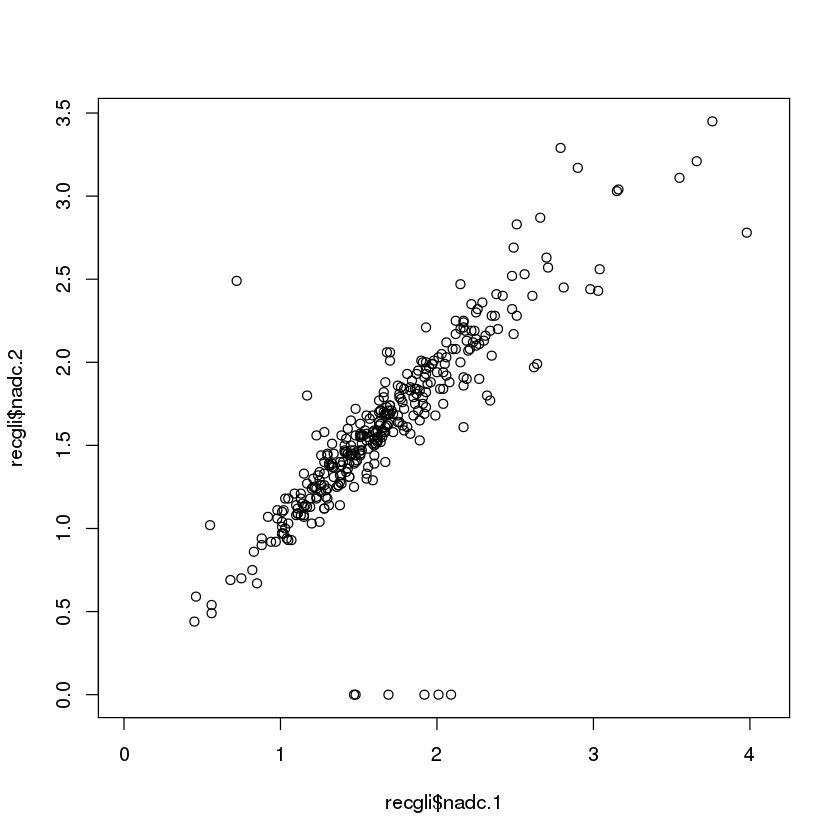

In [47]:
plot(recgli$nadc.1, recgli$nadc.2)

We want to create the most accurate linear approximation as possible, so we must remove the points for which it is clear that b=2000 quantification output a zero when it should have output a different number: 

In [48]:
recgli[which(recgli$nadc.2 ==0),]$nadc.2 = NA 
recgli[which(recgli$nfa.2 ==0),]$nfa.2 = NA 
recgli[which(recgli$nev1.2==0),]$nev1.2 = NA
recgli[which(recgli$nev2.2==0),]$nev2.2 = NA
recgli[which(recgli$nev3.2==0),]$nev3.2 = NA
recgli[which(recgli$nevrad.2==0),]$nevrad.2 = NA

In [49]:
recgli[which(recgli$nadc.1 < 1 & recgli$nadc.2 > 2),]$nadc.2 = NA

In [50]:
diffu.fit = lm(nadc.1~nadc.2, data = recgli)
summary(diffu.fit)


Call:
lm(formula = nadc.1 ~ nadc.2, data = recgli)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67296 -0.08661 -0.00908  0.06850  1.11865 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02755    0.03391  -0.812    0.417    
nadc.2       1.03917    0.01978  52.543   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1741 on 330 degrees of freedom
  (307 observations deleted due to missingness)
Multiple R-squared:  0.8932,	Adjusted R-squared:  0.8929 
F-statistic:  2761 on 1 and 330 DF,  p-value: < 2.2e-16


In [51]:
nadc1from2 = predict(diffu.fit, newdata = recgli[which(is.na(recgli$nadc.1) & !is.na(recgli$nadc.2)),])
nadc1from2

292       295       298       333       334       335       397       398 
1.6143442 1.6766946 1.9468799 2.0300138 1.3857259 1.5416020 1.4688598 1.8949212 
      399       402       403       404       405       406       407       408 
1.4480764 1.3025920 1.6766946 1.1674994 1.1363242 1.6559112 1.3025920 1.6766946 
      409       410       411       412       413       432       433       434 
1.4688598 2.6015595 2.6119512 1.8221790 2.2898073 0.6479124 1.0531903 1.3025920 
      435       452       453       454       455       487       488       489 
1.5727772 1.7910038 1.7182616 1.6143442 1.7910038 0.9908398 1.8949212 1.4896433 
      490       502       503       504       505       507       527       528 
1.9157047 1.6766946 1.1051490 1.3649425 1.7702203 2.2794155 1.1155407 1.6974781 
      529       530       545       546       547       594       595       596 
1.1155407 1.3129838 1.7286533 1.5000351 1.1986746 1.3025920 1.1467159 1.0531903 
      597       598       631       632       633       634 
0.7414381 1.4376846 1.8949212 1.9676633 1.8013955 1.9780551

In [52]:
## so we've created a list of predicted values, whose 'names' should be the same as the row numbers in the data frame that we want to add it to
## for sanity check: recgli$nadc.1[match(names(nadc1from2), rownames(recgli))]=nadc1from2
recgli[631,]
## yep, looks like 631 is a good example of one that does have diffu b=2000 but not 1000. let's go ahead and add these nadc.1 values in: 

b_number t_number sf_number current_scan_date current_surgery_date
631 4424     12105    11673     2018-02-19        2018-02-20          
    current_hist_grade current_hist_type roi.label tumor_cell_evaluation
631 Grade IV           Glioblastoma      39D5                           
    necrosis f8_delicate f8_simple f8_complex mib_1 bx_pure_treatment_effect
631 NA                                        NA                            
    nfse nfl  nt1c nt1v nadc.1 nfa.1 nev1.1 nev2.1 nev3.1 nevrad.1 nadc.2 nfa.2
631 2.01 2.69 1.43 NA   NA     NA    NA     NA     NA     NA       1.85   0.94 
    nev1.2 nev2.2 nev3.2 nevrad.2 cbvn_nlin phn_nlin phn_npar recovn_npar cni
631 1.42   1.76   1.71   1.61     NA        NA       NA       NA          NA 
    ccri crni ncho ncre nnaa nlip laclip nlac olddata newdata comments notes.
631 NA   NA   NA   NA   NA   NA   NA     NA   0       1                NA    
    imaging_code perf_quant spec_quant include_anat include_diffu1000
631 NA           NA         NA         1            0                
    include_diffu2000 include_diffu_all include_perf include_spec
631 1                 1                 0            0           
    include_one_advanced_mod include_all_advanced_mods
631 1                        0

In [53]:
recgli$nadc.1[match(names(nadc1from2), rownames(recgli))]=nadc1from2
recgli[631,]

b_number t_number sf_number current_scan_date current_surgery_date
631 4424     12105    11673     2018-02-19        2018-02-20          
    current_hist_grade current_hist_type roi.label tumor_cell_evaluation
631 Grade IV           Glioblastoma      39D5                           
    necrosis f8_delicate f8_simple f8_complex mib_1 bx_pure_treatment_effect
631 NA                                        NA                            
    nfse nfl  nt1c nt1v nadc.1   nfa.1 nev1.1 nev2.1 nev3.1 nevrad.1 nadc.2
631 2.01 2.69 1.43 NA   1.894921 NA    NA     NA     NA     NA       1.85  
    nfa.2 nev1.2 nev2.2 nev3.2 nevrad.2 cbvn_nlin phn_nlin phn_npar recovn_npar
631 0.94  1.42   1.76   1.71   1.61     NA        NA       NA       NA         
    cni ccri crni ncho ncre nnaa nlip laclip nlac olddata newdata comments
631 NA  NA   NA   NA   NA   NA   NA   NA     NA   0       1               
    notes. imaging_code perf_quant spec_quant include_anat include_diffu1000
631 NA     NA           NA         NA         1            0                
    include_diffu2000 include_diffu_all include_perf include_spec
631 1                 1                 0            0           
    include_one_advanced_mod include_all_advanced_mods
631 1                        0

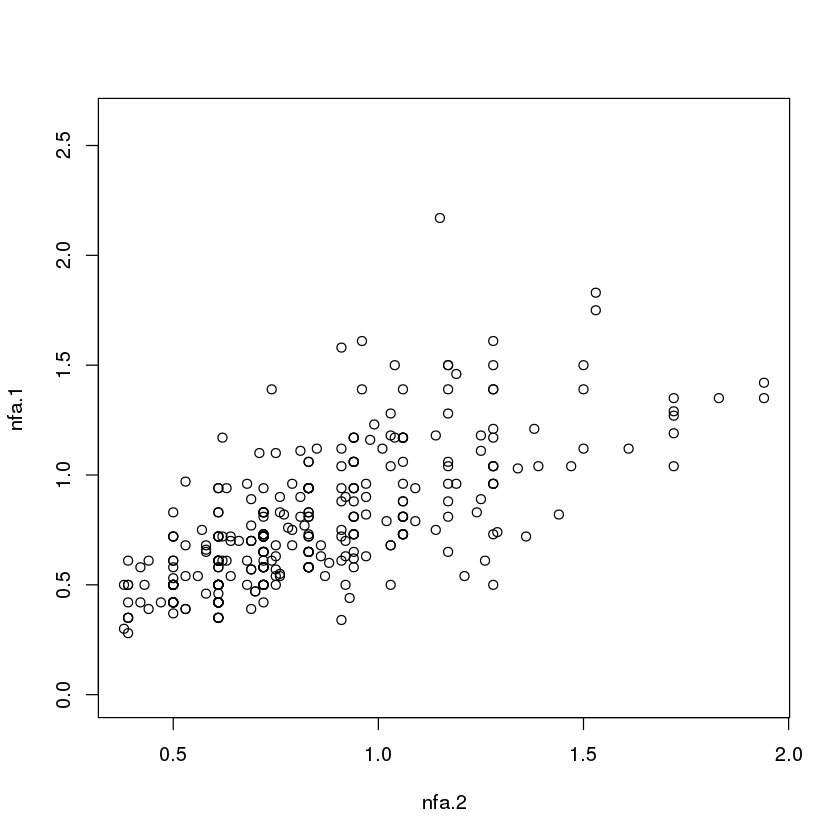

In [54]:
plot(nfa.1~nfa.2, data = recgli)

In [55]:
nfa.fit = lm(nfa.1~nfa.2, data = recgli)
summary(nfa.fit)


Call:
lm(formula = nfa.1 ~ nfa.2, data = recgli)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5904 -0.1339 -0.0383  0.1120  1.1721 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.17888    0.03673   4.871 1.73e-06 ***
nfa.2        0.71215    0.04090  17.413  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2217 on 329 degrees of freedom
  (308 observations deleted due to missingness)
Multiple R-squared:  0.4796,	Adjusted R-squared:  0.478 
F-statistic: 303.2 on 1 and 329 DF,  p-value: < 2.2e-16


In [56]:
preds.nfa = predict(nfa.fit, newdata = recgli[which(is.na(recgli$nfa.1) & !is.na(recgli$nfa.2)),])
head(preds.nfa)
recgli$nfa.1[match(names(preds.nfa), rownames(recgli))]=preds.nfa

197       201       292       295       298       333 
0.7058736 0.7842105 0.7842105 0.9123982 0.8269397 0.6132935

[1] 19

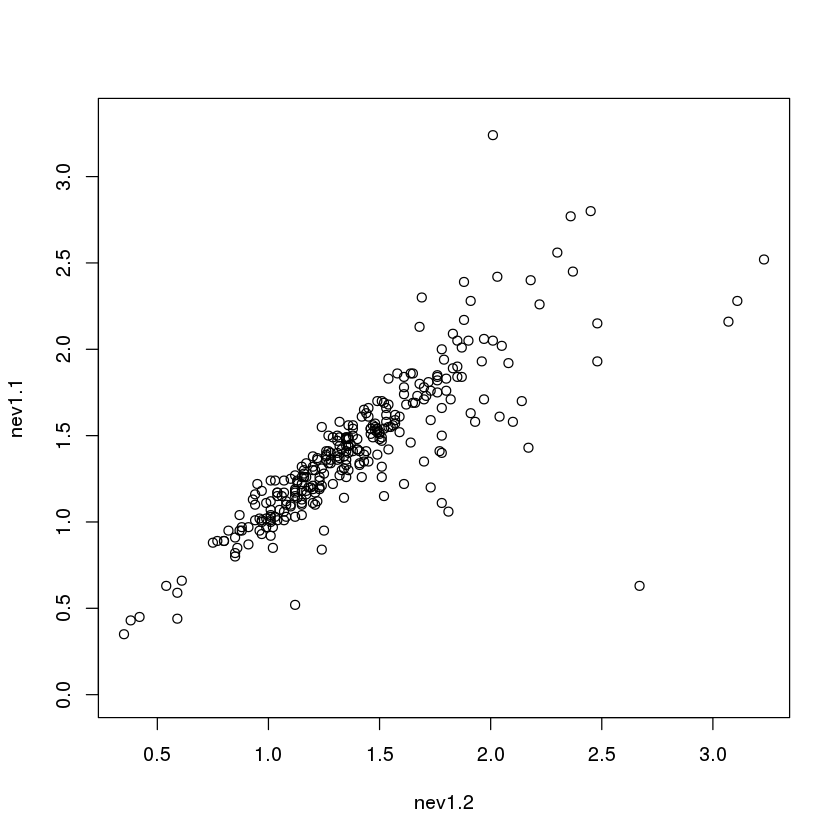

In [57]:
plot(nev1.1~nev1.2, data = recgli)
which(recgli$nev1.2>2.5 & recgli$nev1.1<1)
nev1.fit = lm(nev1.1~nev1.2, data = recgli[-19,])
nev1.preds = predict(nev1.fit, newdata = recgli[which(is.na(recgli$nev1.1) & !is.na(recgli$nev1.2)),])
recgli$nev1.1[match(names(nev1.preds), rownames(recgli))]=nev1.preds

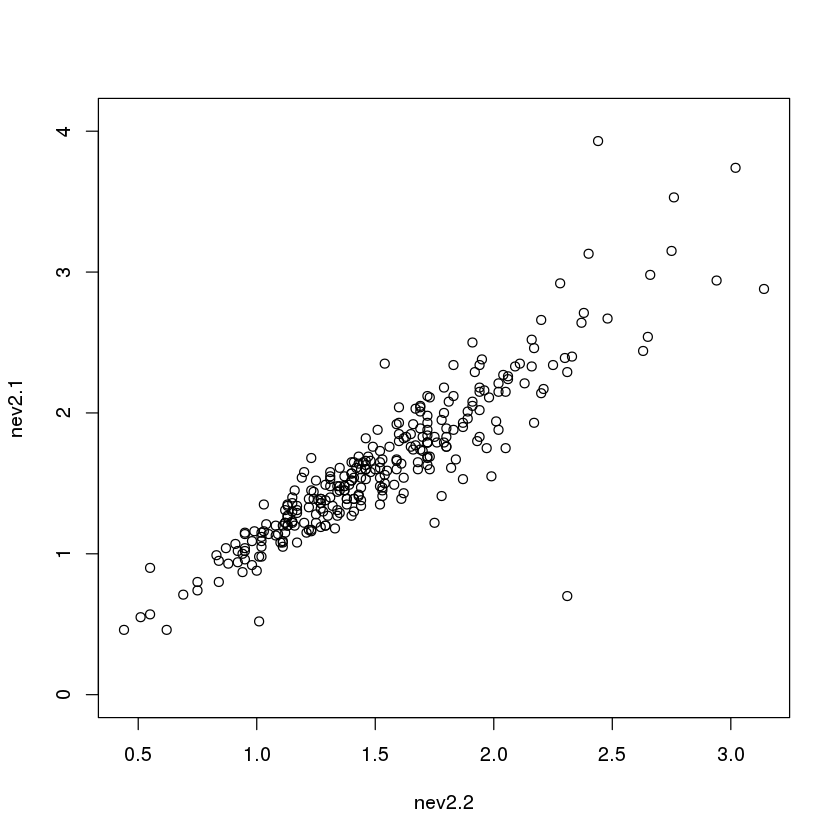

In [58]:
plot(nev2.1~nev2.2, data = recgli)
nev2.fit = lm(nev2.1~nev2.2, data = recgli[-19,])
nev2.preds = predict(nev2.fit, newdata = recgli[which(is.na(recgli$nev2.1) & !is.na(recgli$nev2.2)),])
recgli$nev2.1[match(names(nev2.preds), rownames(recgli))]=nev2.preds

In [59]:
nev3.fit = lm(nev3.1~nev3.2, data = recgli[-19,])
nev3.preds = predict(nev3.fit, newdata = recgli[which(is.na(recgli$nev3.1) & !is.na(recgli$nev3.2)),])
recgli$nev3.1[match(names(nev3.preds), rownames(recgli))]=nev3.preds

In [60]:
nevrad.fit = lm(nevrad.1~nevrad.2, data = recgli[-19,])
nevrad.preds = predict(nevrad.fit, newdata = recgli[which(is.na(recgli$nevrad.1) & !is.na(recgli$nevrad.2)),])
recgli$nevrad.1[match(names(nevrad.preds), rownames(recgli))]=nevrad.preds

In [61]:
write.csv(recgli, "6thAnnot_researchpath_withInVivo.csv", row.names=F)

## 7. Adds in output from get_igt_stats.ipynb, w/ %CEL, NEL, NEC & inclusion criteria (can be found in DataWrangling/GetMergeData/)

In [62]:
getwd()

[1] "/home/sf673542/DataWrangling/AnnotateData"

In [63]:
all_recgli = read.csv("6thAnnot_researchpath_withInVivo.csv")

In [64]:
## Now igt_stats.dev just came out, so I have to re-run everything to get the igt_stats output: 
## To re-run IGT stats, I will go back to GetMergeData & do it from there in a separate notebook.
## I ran this in get_igt_stats
## Hopefully this will be unnecessary in the future. 

In [65]:
biopsy_igt_stats_info = read.csv('../GetMergeData/July2018/igt_stats_information_forBiopsyAnnot.csv')

In [66]:
dim(biopsy_igt_stats_info)

[1] 649  11

In [67]:
dim(all_recgli)

[1] 639  59

In [68]:
all_recgli$roi.label = as.character(all_recgli$roi.label)
biopsy_igt_stats_info$roi.label = as.character(biopsy_igt_stats_info$roi.label)
biopsy_igt_stats_info = biopsy_igt_stats_info[,-1]

In [69]:
## getting rid of extraneous information: 
all_recgli = all_recgli[!is.na(all_recgli$roi.label),]
all_recgli = all_recgli[all_recgli$roi.label !="",]
biopsy_igt_stats_info = biopsy_igt_stats_info[!is.na(biopsy_igt_stats_info$roi.label),]
biopsy_igt_stats_info = biopsy_igt_stats_info[biopsy_igt_stats_info$roi.label != "",]
dim(all_recgli)
dim(biopsy_igt_stats_info)

[1] 619  59

[1] 629  10

In [70]:
recgli = left_join(all_recgli, biopsy_igt_stats_info, by = 'roi.label')
dim(recgli)

[1] 627  68

In [71]:
head(recgli)

b_number t_number sf_number current_scan_date current_surgery_date
1 2723     6369     8122      9/13/09           9/14/09             
2 2312     5317     7679      5/4/08            5/4/08              
3 2901     8089     8403      6/25/10           6/30/10             
4 2474     7408     8701      3/23/11           3/24/11             
5 3169     7540     8796      6/19/11           6/20/11             
6 2312     5317     7679      5/4/08            5/4/08              
  current_hist_grade current_hist_type roi.label tumor_cell_evaluation necrosis
1 Grade IV           Glioblastoma      10B28     0                     0       
2 Grade IV           Glioblastoma      11B16     2                     1       
3 Grade IV           Glioblastoma      11B35     3                     2       
4 Grade IV           Glioblastoma      11B40                                   
5 Grade IV           Glioblastoma      11B43     2                     0       
6 Grade IV           Glioblastoma      12B16     2                     1       
  f8_delicate f8_simple f8_complex mib_1 bx_pure_treatment_effect nfse nfl 
1 2           1         0           0.82 t                        2.10 1.84
2 2           3         0           3.31 f                        2.27 1.44
3 1           0         0             NA f                          NA   NA
4                                     NA                          1.84 1.13
5 3           0         0          17.00 f                        2.35 1.97
6 3           2         0          12.84 f                        2.20 1.56
  nt1c nt1v nadc.1 nfa.1 nev1.1 nev2.1 nev3.1 nevrad.1 nadc.2 nfa.2 nev1.2
1 1.20 0.84 1.31   0.75  1.19   1.28   1.58   1.45       NA     NA    NA  
2 1.88 0.78 1.92   0.68  1.63   1.93   2.34   2.14     1.91   1.03  1.91  
3   NA   NA   NA     NA    NA     NA     NA     NA       NA     NA    NA  
4 0.82 0.79 1.71   0.50  1.35   1.79   2.47   2.12     1.71   0.68  1.43  
5 0.76 0.78 1.34   0.68  1.13   1.34   1.63   1.50       NA     NA    NA  
6 2.04 0.74 2.04   0.89  1.83   2.12   2.22   2.23     1.75   0.69  1.54  
  nev2.2 nev3.2 nevrad.2 cbvn_nlin phn_nlin            phn_npar recovn_npar
1   NA     NA     NA     0.66      0.81                0.79     100.00     
2 1.87   1.88   1.92     2.24      2.25                2.25      98.51     
3   NA     NA     NA       NA      biopsymask-nonexist   NA         NA     
4 1.72   2.02   1.96     1.23      1.28                1.21     100.00     
5   NA     NA     NA     0.58      0.67                0.60     100.00     
6 1.72   2.16   1.96     1.71      1.73                1.88      99.20     
  cni  ccri crni ncho ncre nnaa nlip  laclip nlac olddata newdata
1 4.98 3.28 0.24 1.65 0.53 0.41 -0.01 0.27   0.28 1       0      
2 1.56 0.30 0.75 0.86 0.84 0.46  0.61 1.08   0.47 1       0      
3   NA   NA   NA   NA   NA   NA    NA   NA     NA 1       0      
4 2.48 0.22 1.66 0.88 0.81 0.37  0.24 0.56   0.32 1       0      
5   NA   NA   NA   NA   NA   NA    NA   NA     NA 1       0      
6 2.46 1.30 0.55 1.19 0.87 0.59  0.34 0.83   0.49 1       0      
  comments                                                                          
1                                                                                   
2                                                                                   
3                                                                                   
4                                                                                   
5                                                                                   
6 PP necrosis; some hyalinized BV; tissue is 2/3 tumor score of 3 and 1/3 score of 1
  notes. imaging_code perf_quant spec_quant include_anat include_diffu1000
1 NA     NA            0          0         1            1                
2 NA     NA            0          0         1            1                
3 NA     biopsy_quant NA         NA         0            0                
4 NA     NA  

In [72]:
write.csv(recgli, "7thAnnot_researchpath_withInVivo.csv", row.names = F )

## 8. Excludes ependymomas and other non-astro non-oligo HGGs (desired_hist) 


In [1]:
all_recgli = read.csv("7thAnnot_researchpath_withInVivo.csv")

In [2]:
desired_histology = ifelse(grepl("astrocytoma", all_recgli$current_hist_type, ignore.case = T) |
                             grepl("glioblastoma", all_recgli$current_hist_type, ignore.case = T)|
                             grepl("oligodendroglioma", all_recgli$current_hist_type, ignore.case = T) |
                             grepl("gliosarcoma", all_recgli$current_hist_type, ignore.case = T) |
                             grepl("effect", all_recgli$current_hist_type, ignore.case = T), 1, 0)
dim(all_recgli)
all_recgli = data.frame(all_recgli, desired_hist = desired_histology)
colnames(all_recgli)

[1] 627  68

[1] "b_number"                  "t_number"                 
 [3] "sf_number"                 "current_scan_date"        
 [5] "current_surgery_date"      "current_hist_grade"       
 [7] "current_hist_type"         "roi.label"                
 [9] "tumor_cell_evaluation"     "necrosis"                 
[11] "f8_delicate"               "f8_simple"                
[13] "f8_complex"                "mib_1"                    
[15] "bx_pure_treatment_effect"  "nfse"                     
[17] "nfl"                       "nt1c"                     
[19] "nt1v"                      "nadc.1"                   
[21] "nfa.1"                     "nev1.1"                   
[23] "nev2.1"                    "nev3.1"                   
[25] "nevrad.1"                  "nadc.2"                   
[27] "nfa.2"                     "nev1.2"                   
[29] "nev2.2"                    "nev3.2"                   
[31] "nevrad.2"                  "cbvn_nlin"                
[33] "phn_nlin"                  "phn_npar"                 
[35] "recovn_npar"               "cni"                      
[37] "ccri"                      "crni"                     
[39] "ncho"                      "ncre"                     
[41] "nnaa"                      "nlip"                     
[43] "laclip"                    "nlac"                     
[45] "olddata"                   "newdata"                  
[47] "comments"                  "notes."                   
[49] "imaging_code"              "perf_quant"               
[51] "spec_quant"                "include_anat"             
[53] "include_diffu1000"         "include_diffu2000"        
[55] "include_diffu_all"         "include_perf"             
[57] "include_spec"              "include_one_advanced_mod" 
[59] "include_all_advanced_mods" "X.CEL"                    
[61] "X.NEL"                     "X.NEC"                    
[63] "sum"                       "in_CEL"                   
[65] "in_T2all"                  "in_NEL"                   
[67] "in_NEC"                    "in_ROI"                   
[69] "desired_hist"

In [3]:
all_recgli = write.csv(all_recgli, "8thAnnot_researchpath_withInVivo.csv", row.names = F)

## 9. Creates outcome labels (multnom_out), adds necrosis, makes PN category (pathologically normal) that are in CEL or in the NEL region labeled TxE 

In [4]:
all_recgli = read.csv("8thAnnot_researchpath_withInVivo.csv")

In [5]:
dim(all_recgli)

[1] 627  69

In [8]:
all_recgli = data.frame(all_recgli, multnom_out = NA)## start by labeling all w/ TS = 0 PN and then label those that have chars of txe as such 

#### Start by labeling all w/ TS = 0 PN and then label those that have chars of txe as such 


In [9]:
all_recgli$multnom_out[grep("0", all_recgli$tumor_cell_evaluation)]="PN"

Here i want to find all the biopsies with information using any of the keywords:  
"microglia" "glia" "yalinized" "reactive" "RX" "gliosis" "treatment effect" "tx effect"
"hyalin" "inflammation" 

In [10]:
txe_keyword_search = c(grep("glia", all_recgli$comments, ignore.case = T), 
                       grep("yalin", all_recgli$comments,ignore.case = T),
                       grep("reactive", all_recgli$comments, ignore.case = T),
                       grep("rx", all_recgli$comments, ignore.case = T), 
                       grep("gliosis", all_recgli$comments, ignore.case = T), 
                       grep("effect", all_recgli$comments, ignore.case = T),
                       grep("inflammation", all_recgli$comments, ignore.case = T)) 
ts0 = grep("0", all_recgli$tumor_cell_evaluation)

In [11]:
txe_probably = intersect(grep(1, all_recgli$olddata), grep("t", all_recgli$bx_pure_treatment_effect))
all_recgli$multnom_out[txe_probably]="TxE"
## using the intersection of those w/ ts 0 and have a keyword that matches TxE eval
all_recgli$multnom_out[intersect(ts0, txe_keyword_search)]="TxE"
## labeling TS = 1 (to exclude from analysis)
all_recgli$multnom_out[grep("1", all_recgli$tumor_cell_evaluation)]="Ts1DNI"
## labeling noFFPE 
no_ffpe = ifelse(grepl("FFPE", all_recgli$comments) | grepl("FFPE", all_recgli$notes.), 1, 0)
all_recgli = data.frame(all_recgli, no_ffpe = no_ffpe)
all_recgli$multnom_out[grep(1, all_recgli$no_ffpe)]="noFFPEDNI"
## labeling Indeterminables 
all_recgli$multnom_out[grep("Ind", all_recgli$tumor_cell_evaluation)]="IndDNI"
## labeling rHGG
all_recgli$multnom_out[grep("2", all_recgli$tumor_cell_evaluation)]="rHGG"
all_recgli$multnom_out[grep("3", all_recgli$tumor_cell_evaluation)]="rHGG"
table(all_recgli$multnom_out)
table(is.na(all_recgli$multnom_out))
# FALSE 539, TRUE 81 
## labeling no path_report on box 
all_recgli$multnom_out[grep("path_report", all_recgli$notes.)]="dneDNI"
all_recgli$multnom_out[all_recgli$tumor_cell_evaluation==""]="dneDNI"
table(all_recgli$multnom_out)
dim(all_recgli)


   IndDNI noFFPEDNI        PN      rHGG    Ts1DNI       TxE 
       15        19        51       332        70        72 


FALSE  TRUE 
  559    68 


dneDNI IndDNI     PN   rHGG Ts1DNI    TxE 
    87     15     51    332     70     72 

[1] 627  71

So there are currently still 86 biopsies that need to be annotated; Now let's create a column called "waiting_on_path" 

In [12]:
all_recgli = data.frame(all_recgli, waiting_on_path=ifelse(all_recgli$multnom_out=="dneDNI", 1, 0))

In [13]:
table(all_recgli$waiting_on_path)
dim(all_recgli)


  0   1 
540  87 

[1] 627  72

#### Adding in necrosis to the multnom_out: 

In [14]:
all_recgli$multnom_out = ifelse(is.na(all_recgli$necrosis) | all_recgli$necrosis !=2, as.character(all_recgli$multnom_out), "NecDNI")
table(all_recgli$multnom_out)


dneDNI IndDNI NecDNI     PN   rHGG Ts1DNI    TxE 
    85     10     34     51    320     69     58 

In [15]:
dim(all_recgli)
dim(all_recgli[is.na(all_recgli$multnom_out),]) ## zero w/ no outcome code, let's keep going: 

[1] 627  72

[1]  0 72

#### Need to account for PNs that are actually in CEL or NEL 

In [16]:
PN = subset(all_recgli, all_recgli$multnom_out == "PN")
PN.txe = subset(PN, PN$in_CEL==1 | PN$in_NEL ==1)
dim(PN.txe)
table(!duplicated(PN.txe$t_number)) ##number of potential new TxE samples

[1] 33 72


FALSE  TRUE 
    6    27 

In [17]:
PN.txe$multnom_out = "TxE"

In [18]:
table(all_recgli$multnom_out)


dneDNI IndDNI NecDNI     PN   rHGG Ts1DNI    TxE 
    85     10     34     51    320     69     58 

In [19]:
all_recgli$multnom_out[all_recgli$roi.label %in% PN.txe$roi.label]="TxE"

In [20]:
table(all_recgli$multnom_out)


dneDNI IndDNI NecDNI     PN   rHGG Ts1DNI    TxE 
    85     10     34     18    320     69     91 

In [21]:
write.csv(all_recgli, file = "9thAnnot_researchpath_withInVivo.csv", row.names = F )

## 10. Adds in binary operator to include the data only if it's rHGG or TxE 

In [22]:
recgli = read.csv("9thAnnot_researchpath_withInVivo.csv")

In [23]:
dim(recgli)

[1] 627  72

In [24]:
colnames(recgli)

[1] "b_number"                  "t_number"                 
 [3] "sf_number"                 "current_scan_date"        
 [5] "current_surgery_date"      "current_hist_grade"       
 [7] "current_hist_type"         "roi.label"                
 [9] "tumor_cell_evaluation"     "necrosis"                 
[11] "f8_delicate"               "f8_simple"                
[13] "f8_complex"                "mib_1"                    
[15] "bx_pure_treatment_effect"  "nfse"                     
[17] "nfl"                       "nt1c"                     
[19] "nt1v"                      "nadc.1"                   
[21] "nfa.1"                     "nev1.1"                   
[23] "nev2.1"                    "nev3.1"                   
[25] "nevrad.1"                  "nadc.2"                   
[27] "nfa.2"                     "nev1.2"                   
[29] "nev2.2"                    "nev3.2"                   
[31] "nevrad.2"                  "cbvn_nlin"                
[33] "phn_nlin"                  "phn_npar"                 
[35] "recovn_npar"               "cni"                      
[37] "ccri"                      "crni"                     
[39] "ncho"                      "ncre"                     
[41] "nnaa"                      "nlip"                     
[43] "laclip"                    "nlac"                     
[45] "olddata"                   "newdata"                  
[47] "comments"                  "notes."                   
[49] "imaging_code"              "perf_quant"               
[51] "spec_quant"                "include_anat"             
[53] "include_diffu1000"         "include_diffu2000"        
[55] "include_diffu_all"         "include_perf"             
[57] "include_spec"              "include_one_advanced_mod" 
[59] "include_all_advanced_mods" "X.CEL"                    
[61] "X.NEL"                     "X.NEC"                    
[63] "sum"                       "in_CEL"                   
[65] "in_T2all"                  "in_NEL"                   
[67] "in_NEC"                    "in_ROI"                   
[69] "desired_hist"              "multnom_out"              
[71] "no_ffpe"                   "waiting_on_path"

In [25]:
recgli = data.frame(recgli, rhgg_txe_analysis = ifelse(recgli$multnom_out == "rHGG" | recgli$multnom_out == "TxE", 1, 0))

In [26]:
dim(recgli)

[1] 627  73

In [27]:
table(recgli$rhgg_txe_analysis)


  0   1 
216 411 

In [28]:
write.csv(recgli, file = "10thAnnot_researchPath_withInVivo.csv", row.names = F)